In [2]:
import pandas as pd

In [89]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
#df = df.query('cancer_bengin == cancer_bengin')
df = df.loc[df['withimg_0330'] == 1]
df_0 = df.loc[(df['correlative_proto'] == 'VICCTHO1078') | (df['norm_proto'] == 'VICCTHO1078') | (df['correlative_proto'] == 'VICCTHO0398') | (df['norm_proto'] == 'VICCTHO0398')]
MCL_diag = {}
MCL_list = df_0['MCL_ID'].tolist()
MCL_list = [str(i).replace('.0', '') for i in MCL_list]
MCLset = set(MCL_list)

#print (df_0)
#df_0_pos = set(df_0.loc[df_0['cancer_bengin'] == 1]['MCL_ID'].tolist())
print (len(MCLset))


652


In [77]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_nodup.csv')
df_0 = df.loc[(df['correlative_proto'] == 'VICCTHO0136') | (df['norm_proto'] == 'VICCTHO0136')]
fact = 'CT Nodule Density'
MCL_factor = {}
for i, item in df_0.iterrows():
    MCL_ID = str(item['MCL_ID']).replace('.0', '')
    if MCL_ID not in MCL_factor.keys():
        MCL_factor[MCL_ID] = []
    MCL_factor[MCL_ID].append(item[fact])
#     elif MCL_factor[item['MCL_ID']] != MCL_factor[item['MCL_ID']]:  # which means the value in current dict is None. 
#         MCL_factor[item['MCL_ID']] = item[fact]
cnt = 0        
for key in MCL_factor.keys():
    tmp_list = MCL_factor[key]
    for val in tmp_list:
        if val == val:
            cnt += 1
 #           print (key)
            break
print (cnt, len(MCL_factor.keys()))


8 1354


In [73]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_nodup.csv')
df_0 = df.loc[(df['correlative_proto'] == 'VICCTHO1078') | (df['norm_proto'] == 'VICCTHO1078')]
factors = ['Gender', 'Date of Birth', 'Race', 'Education', 'Exposure (Y/N)', 'DRUGALCOHOL_Q1','CIGARETTE_Q1', 'Prior Cancer', 'Histological Grade', 'Path Staging', 'Lung RADS', 'CT Nodule Number', 'Chest CT Location',"CT Scan Location", "CT Nodule Shape", 'CT Nodule Density', 'CT Nodule Calcified', 'Age Quit', 
          "Pack Years", 'BMI', 'Chest CT Size', 'Smoking Duration']
for fact in factors: 
    print (fact)
    MCL_factor = {}
    for i, item in df_0.iterrows():
        MCL_ID = str(item['MCL_ID']).replace('.0', '')
        if MCL_ID not in MCL_factor.keys():
            MCL_factor[MCL_ID] = []
        MCL_factor[MCL_ID].append(item[fact])
    #     elif MCL_factor[item['MCL_ID']] != MCL_factor[item['MCL_ID']]:  # which means the value in current dict is None. 
    #         MCL_factor[item['MCL_ID']] = item[fact]
    cnt = 0        
    for key in MCL_factor.keys():
        tmp_list = MCL_factor[key]
        for val in tmp_list:
            if val == val:
                cnt += 1
                break
    print (len(MCL_factor.keys()), cnt)
    print (fact, ' missing rate: ', (len(MCL_factor.keys())- cnt) / len(MCL_factor.keys()) )

Gender
393 393
Gender  missing rate:  0.0
Date of Birth
393 393
Date of Birth  missing rate:  0.0
Race
393 393
Race  missing rate:  0.0
Education
393 388
Education  missing rate:  0.01272264631043257
Exposure (Y/N)
393 390
Exposure (Y/N)  missing rate:  0.007633587786259542
DRUGALCOHOL_Q1
393 255
DRUGALCOHOL_Q1  missing rate:  0.3511450381679389
CIGARETTE_Q1
393 392
CIGARETTE_Q1  missing rate:  0.002544529262086514
Prior Cancer
393 392
Prior Cancer  missing rate:  0.002544529262086514
Histological Grade
393 5
Histological Grade  missing rate:  0.9872773536895675
Path Staging
393 18
Path Staging  missing rate:  0.9541984732824428
Lung RADS
393 365
Lung RADS  missing rate:  0.07124681933842239
CT Nodule Number
393 251
CT Nodule Number  missing rate:  0.361323155216285
Chest CT Location
393 46
Chest CT Location  missing rate:  0.8829516539440203
CT Scan Location
393 374
CT Scan Location  missing rate:  0.04834605597964377
CT Nodule Shape
393 195
CT Nodule Shape  missing rate:  0.503816793

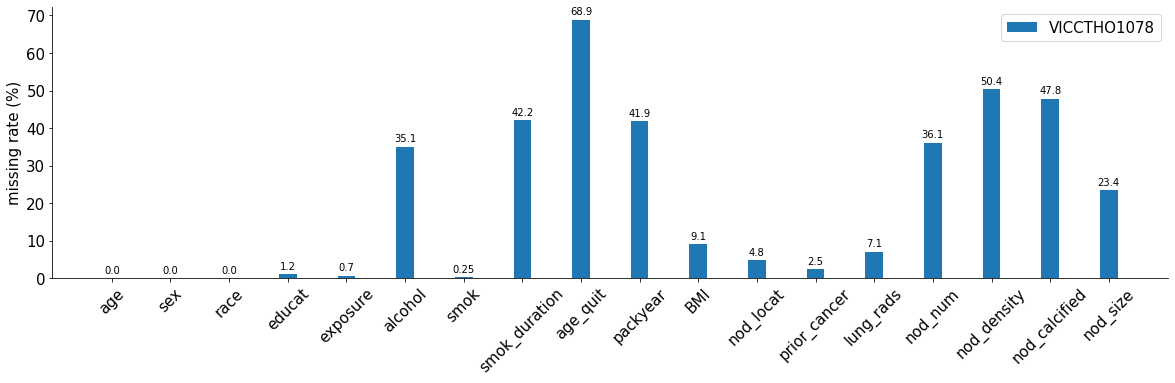

In [43]:
import matplotlib.pyplot as plt

labels = ['age',  'sex', 'race', 'educat', 'exposure', 'alcohol', 'smok', 
          'smok_duration', 'age_quit', 'packyear', 'BMI', 'nod_locat', 'prior_cancer',
         "lung_rads", 'nod_num', 'nod_density', 'nod_calcified', 'nod_size']


weight = [0., 0., 0.0, 1.2, 0.7, 35.1, 0.25,
          42.2, 68.9, 41.9, 9.1, 4.8, 2.5, 
         7.1, 36.1, 50.4, 47.8, 23.4]


x = range(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (20, 5))
rects1 = ax.bar(x , weight, width, label='VICCTHO1078')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('missing rate (%)', fontsize = 15)
#ax.set_title('The importance of factors when caculating the risk')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 15)
#plt.xticks(rotation = 45)
ax.set_xticklabels(labels, fontsize = 15)
ax.legend(fontsize = 15)
plt.show()


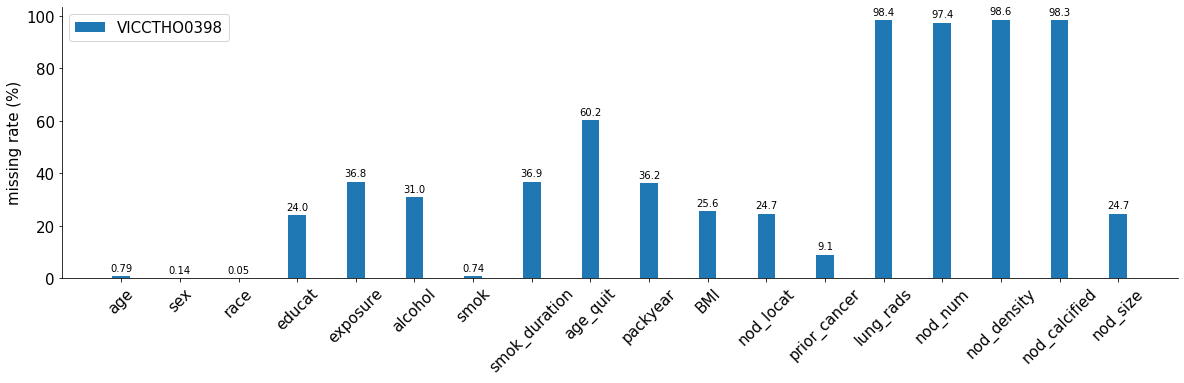

In [12]:
import matplotlib.pyplot as plt

labels = ['age',  'sex', 'race', 'educat', 'exposure', 'alcohol', 'smok', 
          'smok_duration', 'age_quit', 'packyear', 'BMI', 'nod_locat', 'prior_cancer',
         "lung_rads", 'nod_num', 'nod_density', 'nod_calcified', 'nod_size']


weight = [0.79, 0.14, 0.05, 24.0, 36.8, 31.0, 0.74,
          36.9, 60.2, 36.2, 25.6, 24.7, 9.1, 
         98.4, 97.4, 98.6, 98.3, 24.7]


x = range(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (20, 5))
rects1 = ax.bar(x , weight, width, label='VICCTHO0398')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('missing rate (%)', fontsize = 15)
#ax.set_title('The importance of factors when caculating the risk')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["left"].set_visible(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
plt.xticks(rotation = 45)
plt.yticks(fontsize = 15)
#plt.xticks(rotation = 45)
ax.set_xticklabels(labels, fontsize = 15)
ax.legend(fontsize = 15)
plt.show()

In [74]:
# get the report_fourstudy
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
in_four_study = []
four_study = ['VICCTHO1078', 'VICCTHO1730', 'VICCTHO0136', 'VICCTHO0398']
for i, item in df.iterrows():
    if item['correlative_proto'] in four_study or  item['norm_proto'] in four_study:
        in_four_study.append(1)
    else:
        in_four_study.append(0)
df['in_four_study'] = in_four_study
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv', index = False)


df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_nodup.csv')
df = df.loc[df['in_four_study'] == 1]
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_nodup_fourstudy.csv', index = False)

In [1]:
# create the report_nodup.csv, remove the duplicated lines

f = open('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_ori.csv')
lines = f.readlines()
set_lines = set(lines[1:])
#print (len(lines), len(set(lines)))
new_list = sorted(list(set_lines))
f_new = open('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_ori_nodup.csv', 'w')
f_new.write(lines[0])
for i in range(len(new_list)):
    f_new.write(new_list[i])
f_new.close()

In [67]:
df0 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2.csv')
df1 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_nodup.csv')
mcl_list0 = df0['MRN'].tolist()
mcl_list1 = df1['MRN'].tolist()
mcl_list0 = [str(i).replace('.0', '') for i in mcl_list0]
mcl_list1 = [str(i).replace('.0', '') for i in mcl_list1]
print (set(mcl_list0) - set(mcl_list1))

set()


In [111]:
# select some examples for review

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_nodup_fourstudy.csv')
df_0 = df.loc[(df['correlative_proto'] == 'VICCTHO0398') | (df['norm_proto'] == 'VICCTHO0398')]
print (len(set(df_0['Patient ID'].tolist())))
df_miss = df_0.loc[(df_0['Histologic Type'] != df_0['Histologic Type'])] #
print (set(df_miss['Patient ID'].tolist()), len(set(df_miss['Patient ID'].tolist())))
data = pd.DataFrame()
data['PID'] = list(set(df_miss['Patient ID'].tolist()))
data.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/0398_missHistology.csv', index = False)

2272
{7168, 7170, 7171, 6660, 10759, 12807, 7689, 8204, 11277, 11278, 7183, 7184, 13841, 6163, 6165, 7189, 7701, 9238, 7193, 11290, 16411, 7194, 7195, 7196, 11808, 13857, 11298, 7202, 7203, 7205, 7211, 15916, 10797, 7220, 7221, 6198, 7735, 8757, 8760, 7226, 9781, 7229, 7232, 15425, 7233, 7234, 7746, 9799, 5192, 9800, 7242, 7243, 5199, 5200, 13397, 7253, 14935, 7254, 7255, 7256, 12382, 13920, 7776, 12386, 7271, 15976, 7272, 15466, 7275, 7788, 9839, 11888, 12912, 14448, 4721, 12916, 5235, 5236, 7280, 7286, 6265, 5754, 4731, 6268, 7288, 7289, 7292, 16000, 7802, 7298, 14468, 11397, 10377, 5116, 7308, 7309, 10897, 7313, 6803, 7316, 7317, 5118, 7318, 9361, 6297, 6298, 11419, 12443, 7324, 10398, 13987, 6314, 6316, 15023, 6320, 14001, 11954, 7347, 11444, 7349, 16569, 5818, 9404, 5821, 9917, 7359, 7872, 11457, 6849, 16068, 9412, 6654, 11463, 10442, 11980, 5838, 6350, 11985, 7377, 5846, 8918, 11997, 14045, 5348, 6373, 6377, 16107, 7406, 7408, 7410, 8437, 7420, 7426, 12038, 6407, 5395, 14613, 591

In [106]:
# see how many subjects lack of diagnosis
null_set = ['nan', 'Other', 'No Diagnosis', 'Unsatisfactory']
miss_subj = []
for i, item in df_0.iterrows():
    if item['Histologic Type'] != item['Histologic Type']  or item['Histologic Type']in null_set:
        miss_subj.append(item['Patient ID'])
print (len(set(miss_subj)))

24


In [40]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv')
df = df.loc[(df['new_in1730'] == 1) ]
mcl_list = []
for i, item in df.iterrows():
    if item['Chest CT Size'] == item['Chest CT Size'] and 0.6 <= item['Chest CT Size'] and 3 >= item['Chest CT Size']:
        mcl_list.append(str(item['MCL_ID']).replace('.0', ''))
print (len(set(mcl_list)))

1


In [59]:
# for Moyo model computation
# age, Cig: Cigarettes (smoker), Cancer (with extrathoracic cancer 5 years ago), 
#Diameter, SPN (mm), 
import numpy as np
age = 64
ciga = 1
cancer = 0
diameter = 6
spicul = 0
upper = 0
def Mayo(age, ciga, cancer, diameter, spicul, upper):
    ori_val = -6.827 + 0.0391 * age + 0.7917 * ciga +  1.3388 * cancer + 0.1274 * diameter + 1.0407 * spicul + 0.7838 * upper
    prob = np.exp(ori_val) / (1 + np.exp(ori_val))
    return ori_val, prob

In [52]:
sum(spicul), len(spicul)

(437, 22742)

In [58]:
# got the spicu and upper lobe 
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv')
spicul = []
for i, item in df.iterrows():
    if 'spicu' in str(item['Chest CT Notes']):
        spicul.append(1)
    else:
        spicul.append(0)

allset = (set(df['Chest CT Location'].tolist()))
Upper_set = ['LUL/RLL',  'LUL&RLL','LUL','RUL & LUL',  'LUL & RUL','LUL & LLL','RUL, LUL', 'RML & LUL',  
' LUL', 'RUL ','RLL & LUL',  'LUL ', 'RLL & RUL',  'RUL & RLL',  'RUL',  'RUL(hilar)']
upper_list = []
for i, item in df.iterrows():
    if str(item['Chest CT Location']) in Upper_set:
        upper_list.append(1)
    else:
        upper_list.append(0)
df['spicul'] = spicul
df['upperlobe'] = upper_list
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv', index = False)


In [64]:
# normalize the somking and nodule size

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv')
nodule_size, smok = [], []
#print (set(df['CIGARETTE_Q1'].tolist()))
prior_cancer = []
for i, item in df.iterrows():
    if item['Prior Cancer'] != item['Prior Cancer']:
        prior_cancer.append('')
    elif item['Prior Cancer'] == 'Yes':
        prior_cancer.append(1)
    elif item['Prior Cancer'] == 'No':
        prior_cancer.append(0)
    if item['CIGARETTE_Q1'] != item['CIGARETTE_Q1'] or item['CIGARETTE_Q1'] == 'Unknown':
        smok.append('')
    elif item['CIGARETTE_Q1'] == 'Never smoked':
        smok.append(0)
    elif item['CIGARETTE_Q1'] in ['Current smoker', 'Ex-smoker']:
        smok.append(1)
    if item['Chest CT Size'] != item['Chest CT Size']:
        nodule_size.append('')
    else:
        nodule_size.append(item['Chest CT Size'] * 10)
df['nodule_size'] = nodule_size
df['smok'] = smok
df['prior_cancer'] = prior_cancer
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv', index = False)

In [117]:
from datetime import datetime
import re

def convert_to_time1(string):
    month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    str_vec = re.split('[ ,]', string)
    str_vec = [i for i in str_vec if len(i) > 0]
    print (str_vec)
    assert len(str_vec) == 3
    return datetime(int(str_vec[2]), month_dict[str_vec[0]], int(str_vec[1]))

def convert_to_time2(string):
    str_vec = re.split('[/]', string)
    
    assert len(str_vec) == 3
    int_vec = [int(i) for i in str_vec]
    try:
        assert int_vec[0] < 13 and int_vec[1] < 32 and int_vec[2] < 100
    except:
        print (string)
    if int_vec[2] < 21:
        int_vec[2] += 2000
    else:
        int_vec[2] += 1900
    return datetime(int_vec[2], int_vec[0], int_vec[1])

df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv')

diagage_list, ctage_list = [], []
for i, item in df.iterrows():
    print (len(df), i)
    
#     if item['Date of Birth'] == item['Date of Birth'] and item['Diagnosis Date'] == item['Diagnosis Date']:
#         diagage = convert_to_time2(item['Diagnosis Date']) - convert_to_time1(item['Date of Birth'])
#         diagage = round(diagage.days / 365.0, 2)
#         try:
#             assert diagage < 100 and diagage > 20
#             diagage_list.append(diagage)
#         except:
#             print (item['Date of Birth'], item['Diagnosis Date'], diagage, item['Patient ID'])
#             diagage_list.append('')
#     else:
#         diagage_list.append('')
        
    if item['Date of Birth'] == item['Date of Birth'] and item['Chest CT Date (MM/YY)'] == item['Chest CT Date (MM/YY)']:
        ctage = convert_to_time1(item['Chest CT Date (MM/YY)']) - convert_to_time1(item['Date of Birth'])
        ctage = round(ctage.days / 365.0, 2)
        try:
            assert ctage < 100 and ctage > 20
            ctage_list.append(ctage)
        except:
            print (item['Date of Birth'], item['Chest CT Date (MM/YY)'] , ctage, item['Patient ID'])
            ctage_list.append('')
    else:
        ctage_list.append('')
        


22742 0
['Jun', '8', '2001']
['Aug', '4', '1939']
22742 1
['Jan', '28', '2002']
['Feb', '28', '1926']
22742 2
['Jan', '28', '2002']
['Feb', '28', '1926']
22742 3
22742 4
22742 5
22742 6
22742 7
22742 8
22742 9
22742 10
22742 11
22742 12
22742 13
22742 14
22742 15
22742 16
22742 17
22742 18
22742 19
22742 20
22742 21
22742 22
22742 23
22742 24
22742 25
22742 26
22742 27
22742 28
22742 29
22742 30
22742 31
22742 32
22742 33
22742 34
22742 35
22742 36
22742 37
22742 38
22742 39
22742 40
22742 41
22742 42
22742 43
22742 44
22742 45
22742 46
22742 47
22742 48
22742 49
22742 50
22742 51
22742 52
22742 53
22742 54
22742 55
22742 56
22742 57
22742 58
22742 59
22742 60
22742 61
22742 62
22742 63
22742 64
22742 65
22742 66
22742 67
22742 68
22742 69
22742 70
22742 71
22742 72
22742 73
22742 74
22742 75
22742 76
22742 77
22742 78
22742 79
22742 80
22742 81
22742 82
['May', '25', '2013']
['Jan', '1', '1932']
22742 83
['Feb', '13', '2013']
['Nov', '21', '1937']
22742 84
22742 85
22742 86
22742 87
2

22742 423
['Aug', '20', '2013']
['Jan', '31', '1953']
22742 424
['Aug', '20', '2013']
['Jan', '31', '1953']
22742 425
['Aug', '20', '2013']
['Jan', '31', '1953']
22742 426
['Jul', '18', '2013']
['Jan', '11', '1942']
22742 427
['Jul', '18', '2013']
['Jan', '11', '1942']
22742 428
22742 429
22742 430
22742 431
22742 432
22742 433
22742 434
22742 435
22742 436
22742 437
22742 438
22742 439
22742 440
22742 441
22742 442
22742 443
22742 444
22742 445
22742 446
22742 447
22742 448
22742 449
22742 450
22742 451
22742 452
22742 453
22742 454
22742 455
22742 456
22742 457
22742 458
22742 459
22742 460
22742 461
22742 462
22742 463
22742 464
22742 465
22742 466
['Jul', '30', '2013']
['Jul', '29', '1955']
22742 467
['Sep', '22', '2013']
['Nov', '14', '1946']
22742 468
['Sep', '22', '2013']
['Nov', '14', '1946']
22742 469
['Sep', '11', '2013']
['Apr', '26', '1943']
22742 470
['Sep', '11', '2013']
['Apr', '26', '1943']
22742 471
['May', '14', '2013']
['Nov', '25', '1949']
22742 472
['Jul', '23', '2

22742 718
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 719
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 720
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 721
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 722
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 723
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 724
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 725
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 726
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 727
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 728
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 729
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 730
['Oct', '18', '2013']
['Aug', '4', '1954']
22742 731
['Aug', '1', '2013']
['May', '16', '1947']
22742 732
['Aug', '1', '2013']
['May', '16', '1947']
22742 733
['Aug', '1', '2013']
['May', '16', '1947']
22742 734
['Aug', '1', '2013']
['May', '16', '1947']
22742 735
['Aug', '1', '2013']
['May', '16', '1947']
22742 736
['Aug', '1', '2013']
['May', '16', '

22742 1050
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1051
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1052
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1053
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1054
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1055
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1056
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1057
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1058
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1059
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1060
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1061
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1062
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1063
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1064
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1065
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1066
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1067
['Dec', '12', '2013']
['Aug', '19', '1945']
22742 1068

['May', '15', '2013']
['Sep', '28', '1959']
22742 1375
['Feb', '6', '2014']
['Jan', '26', '1940']
22742 1376
['Feb', '6', '2014']
['Jan', '26', '1940']
22742 1377
['Feb', '6', '2014']
['Jan', '26', '1940']
22742 1378
['Feb', '6', '2014']
['Jan', '26', '1940']
22742 1379
['Mar', '14', '2012']
['Oct', '6', '1953']
22742 1380
['Mar', '14', '2012']
['Oct', '6', '1953']
22742 1381
['Mar', '14', '2012']
['Oct', '6', '1953']
22742 1382
['Mar', '14', '2012']
['Oct', '6', '1953']
22742 1383
['Apr', '24', '2014']
['Dec', '6', '1961']
22742 1384
['Mar', '25', '2014']
['Jan', '17', '1945']
22742 1385
['Apr', '28', '2014']
['Oct', '12', '1955']
22742 1386
['Mar', '7', '2014']
['Jan', '26', '1956']
22742 1387
['Mar', '6', '2014']
['Oct', '21', '1939']
22742 1388
['Mar', '6', '2014']
['Oct', '21', '1939']
22742 1389
22742 1390
22742 1391
['Apr', '10', '2014']
['Sep', '16', '1950']
22742 1392
['May', '29', '2014']
['Feb', '18', '1981']
22742 1393
['Apr', '24', '2014']
['Nov', '14', '1937']
22742 1394


22742 1715
22742 1716
22742 1717
22742 1718
22742 1719
22742 1720
22742 1721
22742 1722
22742 1723
22742 1724
22742 1725
22742 1726
22742 1727
22742 1728
22742 1729
22742 1730
22742 1731
22742 1732
22742 1733
22742 1734
22742 1735
22742 1736
22742 1737
22742 1738
22742 1739
22742 1740
22742 1741
22742 1742
22742 1743
22742 1744
22742 1745
22742 1746
22742 1747
22742 1748
22742 1749
22742 1750
22742 1751
22742 1752
22742 1753
22742 1754
22742 1755
22742 1756
22742 1757
['Aug', '6', '2014']
['Jul', '30', '1961']
22742 1758
['Aug', '6', '2014']
['Jul', '30', '1961']
22742 1759
['Aug', '6', '2014']
['Jul', '30', '1961']
22742 1760
['Aug', '6', '2014']
['Jul', '30', '1961']
22742 1761
['Aug', '6', '2014']
['Jul', '30', '1961']
22742 1762
['Aug', '6', '2014']
['Jul', '30', '1961']
22742 1763
['Jul', '15', '2014']
['Sep', '9', '1952']
22742 1764
22742 1765
22742 1766
22742 1767
22742 1768
22742 1769
22742 1770
22742 1771
22742 1772
22742 1773
22742 1774
22742 1775
22742 1776
22742 1777
22742 

22742 2032
22742 2033
22742 2034
22742 2035
22742 2036
22742 2037
22742 2038
22742 2039
['Sep', '5', '2014']
['Apr', '20', '1947']
22742 2040
22742 2041
['Aug', '14', '2014']
['Dec', '6', '1941']
22742 2042
['Aug', '14', '2014']
['Dec', '6', '1941']
22742 2043
['Aug', '14', '2014']
['Dec', '6', '1941']
22742 2044
['Aug', '14', '2014']
['Dec', '6', '1941']
22742 2045
['Aug', '14', '2014']
['Dec', '6', '1941']
22742 2046
['Aug', '14', '2014']
['Dec', '6', '1941']
22742 2047
['Sep', '20', '2014']
['Apr', '5', '1942']
22742 2048
['Sep', '20', '2014']
['Apr', '5', '1942']
22742 2049
['Sep', '8', '2014']
['May', '12', '1935']
22742 2050
['Sep', '8', '2014']
['May', '12', '1935']
22742 2051
['Sep', '8', '2014']
['May', '12', '1935']
22742 2052
['Sep', '8', '2014']
['May', '12', '1935']
22742 2053
['Oct', '1', '2014']
['Aug', '17', '1945']
22742 2054
['Oct', '1', '2014']
['Aug', '17', '1945']
22742 2055
['Oct', '1', '2014']
['Aug', '17', '1945']
22742 2056
['Oct', '1', '2014']
['Aug', '17', '1

22742 2316
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2317
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2318
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2319
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2320
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2321
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2322
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2323
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2324
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2325
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2326
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2327
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2328
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2329
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2330
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2331
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2332
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2333
['Oct', '30', '2014']
['Oct', '31', '1963']
22742 2334

22742 2585
['Apr', '7', '2015']
['Feb', '3', '1959']
22742 2586
['Apr', '17', '2015']
['Jul', '24', '1947']
22742 2587
['Feb', '6', '2015']
['Sep', '11', '1953']
22742 2588
['Feb', '6', '2015']
['Sep', '11', '1953']
22742 2589
['Jan', '9', '2015']
['Sep', '29', '1945']
22742 2590
['Jan', '9', '2015']
['Sep', '29', '1945']
22742 2591
['Apr', '9', '2015']
['Nov', '25', '1949']
22742 2592
['Apr', '24', '2015']
['Feb', '9', '1944']
22742 2593
['Apr', '24', '2015']
['Feb', '9', '1944']
22742 2594
['Apr', '24', '2015']
['Feb', '9', '1944']
22742 2595
['Apr', '30', '2015']
['Oct', '19', '1954']
22742 2596
['Apr', '22', '2015']
['Feb', '3', '1938']
22742 2597
['Apr', '22', '2015']
['Feb', '3', '1938']
22742 2598
['Apr', '23', '2015']
['Dec', '30', '1953']
22742 2599
['Apr', '23', '2015']
['Dec', '30', '1953']
22742 2600
22742 2601
['May', '13', '2015']
['Feb', '20', '1953']
22742 2602
['May', '13', '2015']
['Feb', '20', '1953']
22742 2603
['May', '13', '2015']
['Feb', '20', '1953']
22742 2604


22742 2869
22742 2870
22742 2871
22742 2872
22742 2873
22742 2874
22742 2875
22742 2876
22742 2877
22742 2878
22742 2879
22742 2880
['Aug', '19', '2015']
['Jul', '30', '1938']
22742 2881
['Aug', '4', '2015']
['Sep', '10', '1934']
22742 2882
['Aug', '4', '2015']
['Sep', '10', '1934']
22742 2883
['Aug', '4', '2015']
['Sep', '10', '1934']
22742 2884
['Aug', '4', '2015']
['Sep', '10', '1934']
22742 2885
22742 2886
['Aug', '9', '2015']
['Mar', '31', '1967']
22742 2887
['Aug', '9', '2015']
['Mar', '31', '1967']
22742 2888
['Aug', '9', '2015']
['Mar', '31', '1967']
22742 2889
['Aug', '9', '2015']
['Mar', '31', '1967']
22742 2890
['Aug', '10', '2015']
['Oct', '15', '1965']
22742 2891
['Aug', '10', '2015']
['Oct', '15', '1965']
22742 2892
['Aug', '25', '2015']
['Jan', '29', '1949']
22742 2893
['Aug', '25', '2015']
['Jan', '29', '1949']
22742 2894
['Aug', '25', '2015']
['Jan', '29', '1949']
22742 2895
['Aug', '25', '2015']
['Jan', '29', '1949']
22742 2896
['Aug', '25', '2015']
['Jan', '29', '194

22742 3171
['Apr', '18', '2015']
['May', '18', '1952']
22742 3172
['Apr', '18', '2015']
['May', '18', '1952']
22742 3173
['Apr', '18', '2015']
['May', '18', '1952']
22742 3174
['Apr', '18', '2015']
['May', '18', '1952']
22742 3175
['Apr', '18', '2015']
['May', '18', '1952']
22742 3176
['Apr', '18', '2015']
['May', '18', '1952']
22742 3177
['Apr', '18', '2015']
['May', '18', '1952']
22742 3178
['Apr', '18', '2015']
['May', '18', '1952']
22742 3179
['Apr', '18', '2015']
['May', '18', '1952']
22742 3180
['Apr', '18', '2015']
['May', '18', '1952']
22742 3181
['Apr', '18', '2015']
['May', '18', '1952']
22742 3182
['Apr', '18', '2015']
['May', '18', '1952']
22742 3183
['Apr', '18', '2015']
['May', '18', '1952']
22742 3184
['Apr', '18', '2015']
['May', '18', '1952']
22742 3185
['Apr', '18', '2015']
['May', '18', '1952']
22742 3186
['Apr', '18', '2015']
['May', '18', '1952']
22742 3187
['Apr', '18', '2015']
['May', '18', '1952']
22742 3188
['Apr', '18', '2015']
['May', '18', '1952']
22742 3189

AssertionError: 

In [104]:
def Mayo(age, ciga, cancer, diameter, spicul, upper):
    ori_val = -6.827 + 0.0391 * age + 0.7917 * ciga +  1.3388 * cancer + 0.1274 * diameter + 1.0407 * spicul + 0.7838 * upper
    prob = np.exp(ori_val) / (1 + np.exp(ori_val))
    return ori_val, prob
mayo = []
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/0330/VUMC/Report_need2_nodup.csv')
for i, item in df.iterrows():
    if item['prior_cancer'] != item['prior_cancer'] or item['upperlobe'] != item['upperlobe'] or item['Age'] != item['Age'] or item['spicul'] != item['spicul'] or item['nodule_size'] != item['nodule_size'] or item['smok'] != item['smok']:
        mayo.append('')
    else:
        mayo.append(Mayo(item['Age'], item['smok'], item['prior_cancer'], item['nodule_size'], item['spicul'], item['upperlobe']))